In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
import sympy as sym
import os.path as path


In [ ]:
#Datos
X = np.array([1.4000,3.5000,5.6000])
Y = np.array([0.4007,0.5941,0.2980])


In [ ]:
def Lagrange(x,xi,j):
    prod = 1.0
    n = len(xi)
    for i in range(n):
        if i != j:
            prod *= (x - xi[i])/(xi[j]-xi[i])       
    return prod


In [ ]:
def Poly(x,xi,yi):
    Sum = 0.
    n = len(xi) 
    for j in range(n):
        Sum += yi[j]*Lagrange(x,xi,j)
    return Sum

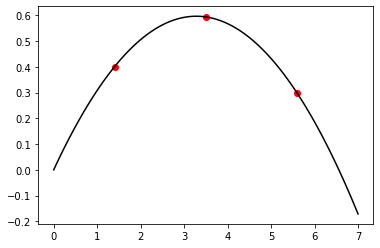

In [ ]:
x = np.linspace(0,7,100)
y = Poly(x,X,Y)
plt.scatter(X,Y,color='r')
plt.plot(x,y,color='k')

In [ ]:
x = sym.Symbol('x')
f = Poly(x,X,Y)

f = sym.expand(f)
f

-0.0554988662131519*x**2 + 0.364039682539682*x - 0.000177777777777832

La ecuación para la trayectoria de un movimiento parabólico está dada por la ecuación: 


$y\:=\:x\:tan\left(\theta \right)\:+\:\frac{g}{2V_0\:cos\left(\theta \right)^2}x^2$

Comparando con las condiciones iniciales. tan que $V_0$= 10  y $\theta$=20 el 
polinomio proporcionado por interpolacion de Lagrange es correcto. 



**Metodo de Interpolacion Newton Gregory **



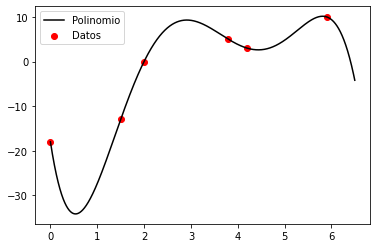

In [ ]:
X = np.array([0,1.5,2,3.8,4.2,5.9])
Y = np.array([-18,-13,0,5,3,10])

def NewtonGregory(X,Y,x):
    sum = Y[0]
    prod = 1
    delf = np.zeros( (len(X),len(Y)+1) )
    delf[:,0] = X
    delf[:,1] = Y
    for i in range(2,len(X)+1):
        for j in range(i-1, len(X)):
            delf_x = (X[j]-X[j-i+1])
            delf[j,i] = (delf[j,i-1]-delf[j-1,i-1])/delf_x
        prod *= (x-X[i-2])
        a_x = delf[i-1,i]
        sum += a_x*prod
    return sum, delf
xp = np.linspace(0,6.5,10000)
y_pg = []
for x in xp:
    y_p,_ = NewtonGregory(X,Y,x)
    y_pg.append(y_p)

plt.scatter(X,Y,color='r',label='Datos')
plt.plot(xp,y_pg,c='black',label='Polinomio')
plt.legend()